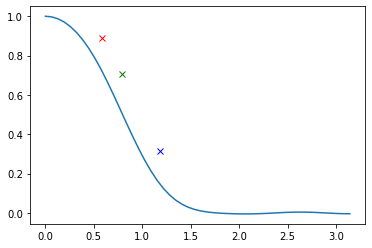

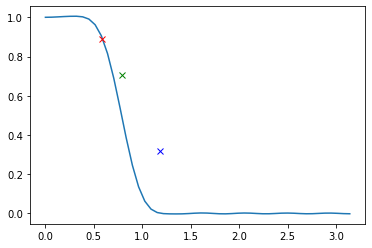

0.5*I*(-exp(0.25*I*pi*M) + exp(0.5*I*pi*n))*exp(-I*pi*(0.125*M + 0.25*n))/(pi*(0.5*M - 1.0*n))

1.0*sin(pi*(M/8 - n/4))/(pi*(0.5*M - 1.0*n))

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import numpy as np
import math

%run 'shared_functions.ipynb' # holds non-SP specific functions
%run 'mm8-exercises.ipynb'
# ignore the below, it is from execcises 8 (until text starts)

# 1)
Conduct a frequency analysis of the transfer function H(z) for the lowpass filter that we found using the Bilinear Transformation in the exercise in lecture 7;

$$
H(z) = 0.0317 \frac{
1 + 3 z^{-1} + 3z^{-2} + z^{-3}
}{
1 - 1.4590 z^{-1} + 0.9104 z^{-2} - 0.1978 z^{-3}
}
$$

## a)
Find poles and zeros in the transfer function and draw the corresponding pole-zero plot.


We wil just use Numpy to do this, as we win nothing from doing it by hand.

- 3 real zeros in $-1$ (a little bit of rounding)
- 1 real pole in 0.4140
- Complex pole pair in $0.52249 \pm j0.4524$

This gives us the equation:

$$
H(z) = 0.0317 \frac{
(z+1)^3
}{
(z-0.4142)(z - (0.5224 + j0.4524))(z - (0.5224 - j0.4524))
}
$$

TODO - Draw it with the vectors like on Ove/Peters slides!...

![oves-circle](figs/mm9-circle.png)

array([-0.99999672+5.68937417e-06j, -0.99999672-5.68937417e-06j,
       -1.00000657+0.00000000e+00j])

array([0.52249256+0.4525065j, 0.52249256-0.4525065j,
       0.41401487+0.j       ])

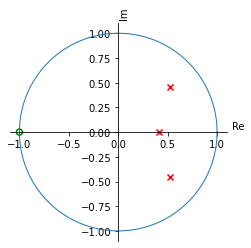

In [2]:
# multiplying with the constant makes no difference
# and should not be done
nom = np.array([1, 3, 3, 1])
den = np.array([1, -1.4590, 0.9104, -0.1978])
zeros = np.roots(nom)
poles = np.roots(den)

display(zeros)
display(poles)

_, ax = plotPoles(poles, zeros)

## b)
Calculate the amplitude values for a number of frequencies using the pole-zero plot.
This is most easily done by writing a program (Matlab, C, Python, ...) which, based on a geometric interpretation of the pole-zero plot, can draft the amplitude response in the frequency interval from 0 to $\pi$, using a frequency step-size of your choice.

For doing this, we setup the following equation, to do trigonomic calculations (check notes for amplitude response):

$$
\begin{align}
|H(e^{j\omega})| &= 0.0317 \frac{|v_4||v_5||v_6|}{|v_1||v_2||v_3|}
= 0.0317 \frac{|v_4|^3}{|v_1||v_2||v_3|} \\
|v_4| &= \sqrt{(\cos{(\omega)}+1)^2+(\sin{(\omega)})^2} \\
|v_1| &= \sqrt{(\cos{(\omega)}-0.5224)^2+(\sin{(\omega)}-0.4524)^2} \\
|v_2| &= \sqrt{(\cos{(\omega)}-0.5224)^2+(\sin{(\omega)}+0.4524)^2} \\
|v_3| &= \sqrt{(\cos{(\omega)}-0.4142)^2+(\sin{(\omega)})^2} \\
\end{align}
$$

We can now calculate the amplitude response in the range $[0; \pi]$

In [3]:
samples = 100
omega = np.linspace(0, math.pi, samples)

h = np.zeros(samples)
for i in range(samples):
    # calculate all v_n's
    oi = omega[i]
    v4 = sp.sqrt((sp.cos(oi)+1)**2 + (sp.sin(oi))**2)
    v1 = sp.sqrt((sp.cos(oi)-0.5524)**2 + (sp.sin(oi)-0.4524)**2)
    v2 = sp.sqrt((sp.cos(oi)-0.5524)**2 + (sp.sin(oi)+0.4524)**2)
    v3 = sp.sqrt((sp.cos(oi)-0.4142)**2 + (sp.sin(oi))**2)
    
    h[i] = 0.0317 * (v4**3)/(v1*v2*v3)
    
fig, ax = plt.subplots()
ax.plot(omega, h)

# stolen from mm8 - any chance in mm8 will change this as well
ax.plot(omega_1, delta_1,'rx')
ax.plot(omega_c, delta_c,'gx')
ax.plot(omega_2, delta_2,'bx')

## c)
Finally, calculate the phase values for a number of frequencies using the pole-zero plot.
This is most easily done by writing a program (Matlab, C, Python, ...) which, based on a geometric interpretation of the pole-zero plot, can draft the phase response in the frequency interval from 0 to π, using a frequency step-size of your choice.

From the notes about phase values, we can see how to do this as well (note we have switched numbering in our fraction, hence the sums are swapped).

$$
\begin{align}
\angle H(e^{j\omega})
&= arg\{H(e^{j\omega}) \}
= arg\{1 \} + \sum_{k=1}^2 arg\{ e^{j\omega} - c_k \} -\sum_{k=1}^2 arg\{ e^{j\omega} - d_k \} \\
&= arg\{ 0.0317 \} - \sum_{k=1}^3 \varphi_j + \sum_{k=4}^6 \varphi_j 
= 3\varphi_4 - \sum_{k=1}^3 \varphi_j
\end{align}
$$

$$
\begin{align}
\varphi_4
\Rightarrow \tan{(\varphi_4)} = \frac{\sin{(\omega)}}{\cos{(\omega)}+1}
\Rightarrow \varphi_4 = \arctan{\left( \frac{\sin{(\omega)}}{\cos{(\omega)}+1} \right) } \\
\varphi_1 = \arctan{\left( \frac{\sin{(\omega)}-0.4524}{\cos{(\omega)}-0.5224} \right) } \\
\varphi_2 = \arctan{\left( \frac{\sin{(\omega)}+0.4524}{\cos{(\omega)}-0.5224} \right) } \\
\varphi_3 = \arctan{\left( \frac{\sin{(\omega)}}{\cos{(\omega)}-0.4142} \right) } \\
\end{align}
$$

We can now do the same as above, to calculate the phase response.

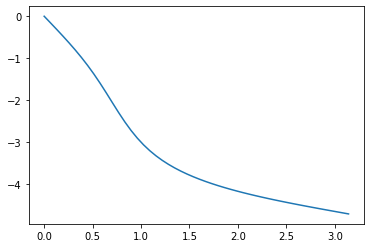

In [4]:
samples = 50
# 10**(-5), as we do not want extra phase-jump
omega = np.linspace(0, math.pi-10**(-5), samples)

h = np.zeros(samples)
for i in range(samples):
    # calculate all v_n's
    oi = omega[i]
    v4 = sp.atan((sp.sin(oi))/(sp.cos(oi)+1))
    v1 = sp.atan((sp.sin(oi)-0.4524)/(sp.cos(oi)-0.5224))
    v2 = sp.atan((sp.sin(oi)+0.4524)/(sp.cos(oi)-0.5224))
    v3 = sp.atan((sp.sin(oi))/(sp.cos(oi)-0.4142))
    
    # take phase jumps into account
    if oi > sp.acos(0.5224):
        v1 += sp.pi
        v2 += sp.pi
    if oi > sp.acos(0.4142):
        v3 += sp.pi
        
    # we have a single point, where sympy
    # will return +- result, because of
    # some negativity, we will just 
    # ignore that by doing this
    try:
        h[i] = 3*v4 - (v1 + v2 + v3)
    except TypeError as e:
        print("Ignored a point at: ", i)
        display(e)
        pass
    
fig, ax = plt.subplots()
ax.plot(omega, h)

# 2)
Using again the lowpass filter H(z) found in the exercise in lecture 7, you should now conduct a frequency transformation in order to derive a 3'rd order Butterworth highpass filter with the 3dB frequency located at $\frac{3\pi}{4}$.

From the slides we get a table, which shows how to go from a digital low-pass filter prototype, to various other filters (check notes for more).

From this we get the following transformation (note the capital Z and lowercase z):

$$
H_{HP}(z) = \left. H_{LP}(z) \right|_{Z^{-1}=-\frac{z^{-1}+\alpha}{1+\alpha z^{-1}}}
$$

With the following associated design formulas:

$$
\alpha = - \frac{\cos{\left( \frac{\theta_p + \omega_p}{2} \right)}}{\cos{\left( \frac{\theta_p - \omega_p}{2} \right)}}
$$

Where $\theta_p$ denotes the lowpass digital filter prototype cutoff freqency, and $\omega_p$ denotes the desired cutoff frequency.

From MM7, we know that the digital LPP cutoff frequency is $\frac{\pi}{4}$, found in MM7, using the most important formula $\omega = T_d \cdot \Omega = \frac{1}{8 \cdot 10^3} \cdot 2 \pi 1000 = \frac{\pi}{4}$, and we have been given the desired cutoff freqency, therefore we get the following.

- $\theta_p = \frac{\pi}{4}$
- $\omega_p = \frac{3\pi}{4}$

$$
\alpha = - \frac{
\cos{\left( \frac{\frac{\pi}{4} + \frac{3\pi}{4}}{2} \right)}
}{
\cos{\left( \frac{\frac{\pi}{4} - \frac{3\pi}{4}}{2} \right)}
}
= - \frac{
\cos{\left( \frac{\pi}{2} \right)}
}{
\cos{\left( -\frac{\pi}{4} \right)}
}
= 0
$$

If we the put this into our transformation, we get the following:

$$
Z^{-1}=-\frac{z^{-1}+\alpha}{1+\alpha z^{-1}}
=-\frac{z^{-1}+0}{1+0 z^{-1}}
=-\frac{z^{-1}}{1}
=-z^{-1}
$$

Which we can then put into our original LPP filer (remember, you can define the with constants $a_{1,\dots,N}$ in the numerator, and $b_{1,\dots,N}$ in the denumerator).

$$
H(z)_{LP} = 0.0317 \frac{
1 + 3 z^{-1} + 3z^{-2} + z^{-3}
}{
1 - 1.4590 z^{-1} + 0.9104 z^{-2} - 0.1978 z^{-3}
}
$$

Thus we get the following:

$$
H(z)_{HP} = 0.0317 \frac{
1 - 3 z^{-1} + 3z^{-2} - z^{-3}
}{
1 + 1.4590 z^{-1} + 0.9104 z^{-2} + 0.1978 z^{-3}
}
$$

Keep in mind, the reason for some of them staying with the same sign, is because of the exponent.
E.g.

$$
\begin{align}
z^{-1} &= -z^{-1} \\
z^{-2} &= -z^{-1} \cdot -z^{-1} = z^{-2} \\
z^{-3} &= -z^{-1} \cdot -z^{-1} \cdot -z^{-1} = -z^{-3} \\
\end{align}
$$

# 3)
Redo question 1, but now for the Highpass filter just found. Alternatively, you may find the Matlab function "freqz" quite useful...

(-0.15033011721279282,
 3.2919227708025858,
 -6.503129596607048,
 -1.3385859641114033)

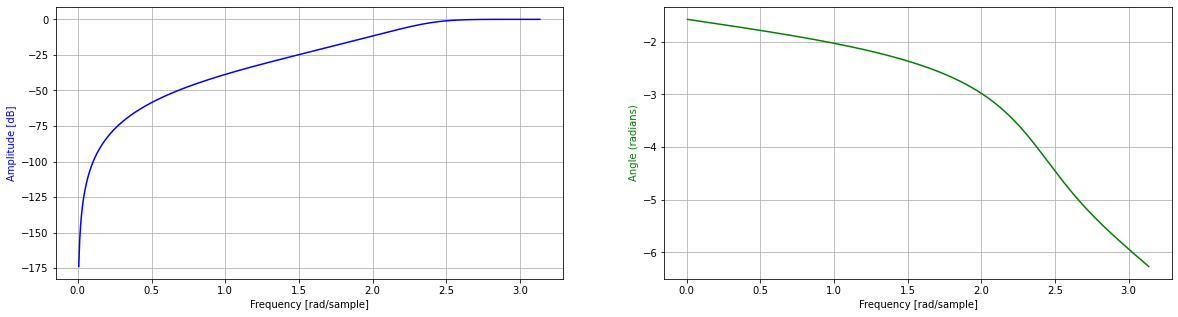

In [5]:
# our transfer function
G = 0.0317
B = np.array([1, -3, 3, -1])
Bs = G*B
A = [1, 1.4590, 0.9104, 0.1978]

# use freqz! (variables are named a little different)
w, h = signal.freqz(Bs, A)
# exclude the first value, as it gives us a low dip in 0
w, h = w[1:], h[1:]

fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax1, ax2 = ax[0], ax[1]
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax1.grid()

angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.set_xlabel('Frequency [rad/sample]')
ax2.grid()
ax2.axis('tight')